# Линейная регрессия

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('KNKZ#4.csv')
df

,title,price,href,address,year,content,area
0,title,price,href,address,year,content,area
1,"4-комнатная квартира, Сатпаева - Бухар Жырау",85000000,/obyavleniya/prodazha-kvartiry-121m-v-almaty-3...,['Сатпаева\xa0- Бухар Жырау'],2006,монолитный. Продается 3-комнатная квартира в Ж...,121
2,"2-комнатная квартира, Гагарина, 233",43000000,/obyavleniya/prodazha-kvartiry-53.41m-v-almaty...,"['Гагарина', '233']",2021,"ЖК Terra, монолитный. Продается 2-комнатная кв...",53.41
3,"2-комнатная квартира, Самал-2 мкр-н, 46 - Менд...",35000000,/obyavleniya/prodazha-kvartiry-60.5m-v-almaty-...,"['Самал-2 мкр-н', '46\xa0- Мендикулова']",1989,"кирпичный. Не угловая. Уважаемые товарищи, об...",60.5
4,"2-комнатная квартира, Ладушкина - Кашгарская",43950000,/obyavleniya/prodazha-kvartiry-68m-v-almaty-30...,['Ладушкина\xa0- Кашгарская'],2008,"ЖК Зеленая Долина (Коттеджный городок), моноли...",68
...,...,...,...,...,...,...,...
1655,"2-комнатная квартира, Шаляпина, 11",13000000,/obyavleniya/prodazha-kvartiry-44m-v-almaty-13...,"['Шаляпина', '11']",1969,"панельный. Санузел совмещенный, балкон застекл...",44
1656,"1-комнатная квартира, Абая, 10в",9000000,/obyavleniya/prodazha-kvartiry-32m-v-almaty-13...,"['Абая', '10в']",1960,"панельный. Санузел совмещенный, косметический ...",32
1657,"2-комнатная квартира, Жубанова, 18а",12000000,/obyavleniya/prodazha-kvartiry-44m-v-almaty-13...,"['Жубанова', '18а']",1969,"панельный. Балкон застекленный, двери металлич...",44
1658,"2-комнатная квартира, Берегового, 8 - Койшыманова",13000000,/obyavleniya/prodazha-kvartiry-45m-v-almaty-99...,"['Берегового', '8\xa0- Койшыманова']",1969,"панельный. Санузел совмещенный, балкон застекл...",45


In [4]:
df = df[df['price'] != 'price']

In [5]:
df['price'] = df['price'].astype("int")

In [6]:
df['price']

1       85000000
2       43000000
3       35000000
4       43950000
5       27000000
          ...   
1655    13000000
1656     9000000
1657    12000000
1658    13000000
1659    15000000
Name: price, Length: 1594, dtype: int32

In [7]:
df['room'] = df['title']

In [8]:
df['room'] = df['room'].str.split('-', 1, expand=True)

In [9]:
df['room'] = df['room'].astype("int")

In [10]:
df['room']

1       4
2       2
3       2
4       2
5       2
       ..
1655    2
1656    1
1657    2
1658    2
1659    3
Name: room, Length: 1594, dtype: int32

In [11]:
df['area'] = df['area'].astype("float")

In [12]:
df['year'] = df['year'].astype("int")

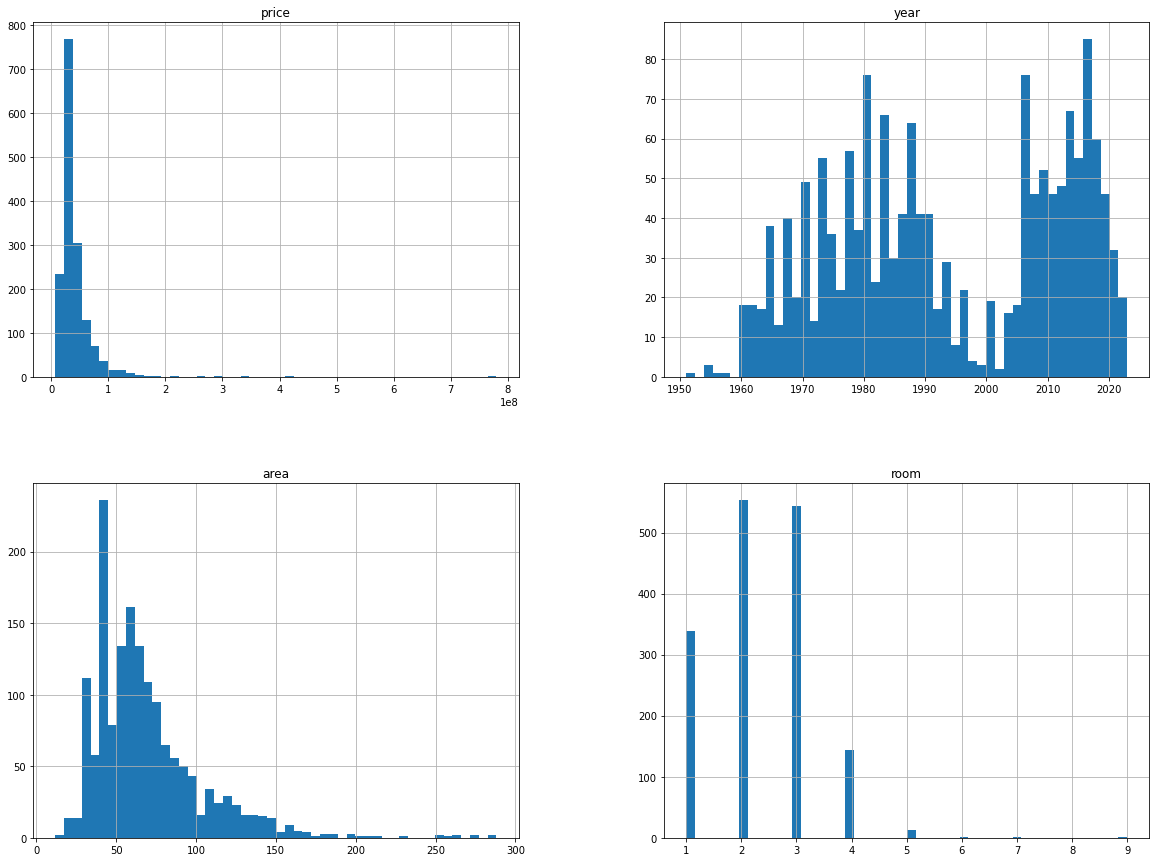

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [14]:
df

,title,price,href,address,year,content,area,room
1,"4-комнатная квартира, Сатпаева - Бухар Жырау",85000000,/obyavleniya/prodazha-kvartiry-121m-v-almaty-3...,['Сатпаева\xa0- Бухар Жырау'],2006,монолитный. Продается 3-комнатная квартира в Ж...,121.00,4
2,"2-комнатная квартира, Гагарина, 233",43000000,/obyavleniya/prodazha-kvartiry-53.41m-v-almaty...,"['Гагарина', '233']",2021,"ЖК Terra, монолитный. Продается 2-комнатная кв...",53.41,2
3,"2-комнатная квартира, Самал-2 мкр-н, 46 - Менд...",35000000,/obyavleniya/prodazha-kvartiry-60.5m-v-almaty-...,"['Самал-2 мкр-н', '46\xa0- Мендикулова']",1989,"кирпичный. Не угловая. Уважаемые товарищи, об...",60.50,2
4,"2-комнатная квартира, Ладушкина - Кашгарская",43950000,/obyavleniya/prodazha-kvartiry-68m-v-almaty-30...,['Ладушкина\xa0- Кашгарская'],2008,"ЖК Зеленая Долина (Коттеджный городок), моноли...",68.00,2
5,"2-комнатная квартира, Казахфильм мкр-н, 26",27000000,/obyavleniya/prodazha-kvartiry-45m-v-almaty-30...,"['Казахфильм мкр-н', '26']",1977,панельный. Перепланировка не узаконена! Только...,45.00,2
...,...,...,...,...,...,...,...,...
1655,"2-комнатная квартира, Шаляпина, 11",13000000,/obyavleniya/prodazha-kvartiry-44m-v-almaty-13...,"['Шаляпина', '11']",1969,"панельный. Санузел совмещенный, балкон застекл...",44.00,2
1656,"1-комнатная квартира, Абая, 10в",9000000,/obyavleniya/prodazha-kvartiry-32m-v-almaty-13...,"['Абая', '10в']",1960,"панельный. Санузел совмещенный, косметический ...",32.00,1
1657,"2-комнатная квартира, Жубанова, 18а",12000000,/obyavleniya/prodazha-kvartiry-44m-v-almaty-13...,"['Жубанова', '18а']",1969,"панельный. Балкон застекленный, двери металлич...",44.00,2
1658,"2-комнатная квартира, Берегового, 8 - Койшыманова",13000000,/obyavleniya/prodazha-kvartiry-45m-v-almaty-99...,"['Берегового', '8\xa0- Койшыманова']",1969,"панельный. Санузел совмещенный, балкон застекл...",45.00,2


In [60]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [61]:
df_train = df.iloc[:,[1,4,6,7]]

In [62]:
df_train

,price,year,area,room
1,85000000,2006,121.00,4
2,43000000,2021,53.41,2
3,35000000,1989,60.50,2
4,43950000,2008,68.00,2
5,27000000,1977,45.00,2
...,...,...,...,...
1655,13000000,1969,44.00,2
1656,9000000,1960,32.00,1
1657,12000000,1969,44.00,2
1658,13000000,1969,45.00,2


In [63]:
scaler = MinMaxScaler()
scaler.fit(df_train) 
scaled_df = scaler.transform(df_train)

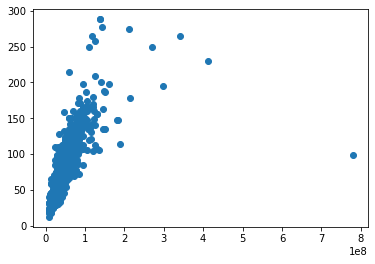

In [64]:
plt.scatter(df_train['price'], df_train['area']);

# Линейная регрессия

In [65]:
x = df_train.iloc[:, [2]].values
y = df_train.iloc[:,[0]].values

#x = (x - x.mean()) / x.std()
#x = np.c_[np.ones(x.shape[0]), x]

In [66]:
x

array([[121.  ],
       [ 53.41],
       [ 60.5 ],
       ...,
       [ 44.  ],
       [ 45.  ],
       [ 59.  ]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [68]:
X_train.shape, y_train.shape

((1275, 1), (1275, 1))

In [69]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

score = regressor.score(X_train, y_train)
y_pred = regressor.predict(X_test)

In [70]:
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Score:', score)

Coefficients: [[696932.53766412]]
Intercept: [-6962966.79870264]
Score: 0.46267289565461167


In [71]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 218005135413126.78


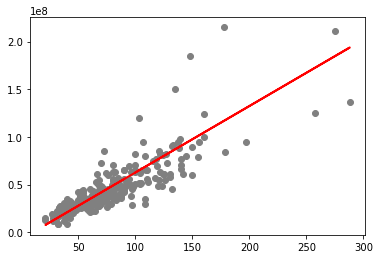

In [80]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [29]:
df_train

,price,year,area,room
1,85000000,2006,121.00,4
2,43000000,2021,53.41,2
3,35000000,1989,60.50,2
4,43950000,2008,68.00,2
5,27000000,1977,45.00,2
...,...,...,...,...
1655,13000000,1969,44.00,2
1656,9000000,1960,32.00,1
1657,12000000,1969,44.00,2
1658,13000000,1969,45.00,2


#  Множественная линейная регрессия

In [30]:
x = df_train.drop('price', axis=1)
y = df_train.iloc[:,[0]].values

#x = (x - x.mean()) / x.std()
#x = np.c_[np.ones(x.shape[0]), x]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
y_pred = model.predict(X_test)

In [51]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Score:', score_train, score_test)



Coefficients: [[  43706.52672167  696383.79828303 -453372.35421988]]
Intercept: [-92995245.59728572]
Score: 0.46332102546163867 0.7034537601005333


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9208389.299443513
Mean Squared Error: 215561330906592.2
Root Mean Squared Error: 14682007.046265582


# Логарифмическое преобразование

In [77]:
y_log = np.log(df_train['price'])
y_log.head()

1    18.258162
2    17.576711
3    17.370859
4    17.598563
5    17.111347
Name: price, dtype: float64

In [73]:
y_log.skew()

0.7040025292196461

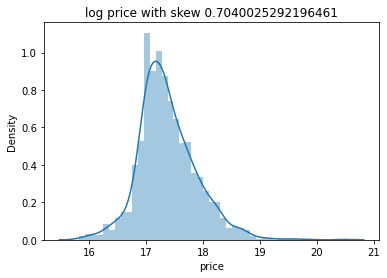

In [74]:
sns.distplot(y_log)
plt.title(f'log price with skew {y_log.skew()}')
plt.show()

In [75]:
x = df_train.drop('price', axis=1)
y = np.log(df_train['price'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Score:', score_train, score_test)

Coefficients: [0.00318972 0.01006778 0.08646889]
Intercept: 10.116877461803364
Score: 0.7295807307780267 0.7336255258055691


In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1933696087552534
Mean Squared Error: 0.06898808928231868
Root Mean Squared Error: 0.2626558380891593
